# 🌟 **Internship Tasks at Prodigy Infotec: Generative AI Intern**

* As a Generative AI Intern at Prodigy Infotec, you will be involved in exciting and innovative projects that focus on building advanced AI models and techniques. 
* These projects will help you sharpen your skills in various aspects of machine learning, deep learning, and computer vision. 
* Here’s a step-by-step explanation of how you’ll achieve these tasks and contribute to the team:

## 1. **Neural Style Transfer (NST)**

### 🖼️ **Task 5 Overview:**
You will be implementing Neural Style Transfer (NST) to merge the content of one image with the style of another. Essentially, you’ll take two images:
- **Content Image**: This is the base image (e.g., a photo of a landscape).
- **Style Image**: This is the style image (e.g., a painting by Van Gogh).

The goal is to transfer the artistic style from the style image onto the content image while preserving the content structure of the content image.

### 🎯 **How You’ll Achieve This:**
1. **Image Loading and Preprocessing**: 
   - You'll load the content and style images using TensorFlow, then preprocess them to ensure they are in the right format for deep learning models.
   
2. **Feature Extraction**: 
   - You’ll utilize a pre-trained model (like VGG19) to extract feature maps from both images. The VGG19 model is great for this task because it is trained on a vast dataset and is proficient at understanding high-level image features.
   
3. **Loss Function Definition**: 
   - You’ll define loss functions that measure:
     - **Content Loss**: The difference in content between the content image and the generated image.
     - **Style Loss**: The difference in style between the style image and the generated image, measured by the Gram matrix of the feature maps.
     - **Total Variation Loss**: This helps in reducing noise in the generated image.
   
4. **Optimization**: 
   - You’ll use an optimization algorithm (like Adam) to adjust the generated image so that the total loss is minimized. Essentially, this means tweaking the generated image to make it both match the content and adopt the style.
   
5. **Final Output**: 
   - Once the model converges, you’ll generate the stylized image that combines the content of the content image with the artistic style of the style image.

### 🚀 **Outcome:**
By the end of this project, you will have developed a system that can create artistic representations of content images, blending them with various styles, using advanced deep learning techniques.


## 🤖 Importing Libraries for Deep Learning Model  

### Steps:  
1. 📦 **Import TensorFlow**  
   - Loads TensorFlow for building and training deep learning models.  

2. 🏗️ **Import Keras Layers**  
   - Includes layers for convolution (`Conv2D`), normalization (`BatchNormalization`), upsampling (`UpSampling2D`), flattening (`Flatten`), dense connections (`Dense`), and resizing (`Resizing`).  

3. 🏛️ **Import Sequential API**  
   - Allows easy construction of neural networks in a layer-wise manner.  

4. 📊 **Import Matplotlib**  
   - Enables visualization of training results and model outputs.  

5. ✅ **Ready for Model Development**  
   - These imports provide all necessary tools for building and training a deep learning model.  


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, UpSampling2D, Flatten, Dense, Resizing
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

## 🏗️ Defining the Generator Model  

### Steps:  
1. 🛠️ **Create a Sequential Model**  
   - Initializes a sequential model where layers will be stacked in order.

2. 🖼️ **Add Convolutional Layers**  
   - The first `Conv2D` layer processes the input image with 64 filters and a 4x4 kernel, followed by batch normalization.
   - The second `Conv2D` layer processes with 128 filters, applying similar steps.

3. 🔼 **Add Upsampling Layer**  
   - Uses `UpSampling2D` to increase the resolution of the image, making the output size larger than the input.

4. 🎨 **Add Output Layer**  
   - A final `Conv2D` layer with a "tanh" activation function to generate images in the range of [-1, 1].

5. 🔄 **Resizing Output**  
   - Resizes the image to the desired shape (256, 256, 3) to ensure the generated image matches the target dimensions.

6. ✅ **Return the Generator Model**  
   - The model is now ready to be compiled and used for training.


In [2]:
# Define the Generator
def build_generator():
    model = Sequential()

    # Define the layers of the generator
    model.add(Conv2D(64, (4, 4), strides=(2, 2), padding="same", activation="relu", input_shape=(256, 256, 3)))  # Input layer
    model.add(BatchNormalization())

    # More layers (expand as necessary)
    model.add(Conv2D(128, (4, 4), strides=(2, 2), padding="same", activation="relu"))
    model.add(BatchNormalization())

    # Upsampling to get bigger output (example)
    model.add(UpSampling2D(size=(2, 2)))  # Example of upsampling to increase image resolution

    # Output layer
    model.add(Conv2D(3, (4, 4), activation="tanh", padding="same"))  # Output layer to generate image

    # Resizing the output to match the required shape (256, 256, 3)
    model.add(Resizing(256, 256))

    return model


## 🛡️ Defining the Discriminator Model  

### Steps:  
1. 🛠️ **Create a Sequential Model**  
   - Initializes a sequential model where layers will be stacked sequentially.

2. 🖼️ **Add Convolutional Layers**  
   - The first `Conv2D` layer processes the input image with 64 filters and a 4x4 kernel, applying ReLU activation.
   - The second `Conv2D` layer processes with 128 filters, applying similar steps.

3. 🔄 **Flatten the Output**  
   - The `Flatten` layer reshapes the output into a 1D vector to feed into a fully connected layer.

4. 🔢 **Add Dense Layer**  
   - A `Dense` layer with a single unit and a sigmoid activation function to output a probability (real or fake).

5. ✅ **Return the Discriminator Model**  
   - The model is ready to classify images as either real or generated.


In [3]:
# Define the Discriminator
def build_discriminator():
    model = Sequential()

    # Define layers for the discriminator
    model.add(Conv2D(64, (4, 4), strides=(2, 2), padding="same", activation="relu", input_shape=(256, 256, 3)))
    model.add(Conv2D(128, (4, 4), strides=(2, 2), padding="same", activation="relu"))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))  # Output a single scalar

    return model

## ⚖️ Defining Loss Functions for GANs  

### Steps:  
1. 🛠️ **Generator Loss**  
   - The function `generator_loss` computes the L1 loss, which measures the difference between the generated image and the target image to ensure image quality.
   - Uses the absolute difference (`tf.abs`) and averages it using `tf.reduce_mean`.

2. 🏆 **Discriminator Loss**  
   - The function `discriminator_loss` calculates the binary cross-entropy loss for both real and generated images:
     - **Real loss**: Measures how well the discriminator classifies real images as real.
     - **Generated loss**: Measures how well the discriminator classifies fake images as fake.
   - Both losses are summed to get the total loss for the discriminator.

3. ✅ **Return Loss Values**  
   - The functions return the computed losses for use in model training.


In [4]:
# Loss functions
def generator_loss(disc_generated_output, generated_image, target):
    # L1 loss between generated and target (for image quality)
    l1_loss = tf.reduce_mean(tf.abs(target - generated_image))
    return l1_loss

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.ones_like(disc_real_output), disc_real_output))
    generated_loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(tf.zeros_like(disc_generated_output), disc_generated_output))
    return real_loss + generated_loss


## ⚙️ Defining Optimizers for GANs  

### Steps:  
1. 🧑‍💻 **Generator Optimizer**  
   - Initializes the Adam optimizer with a learning rate of 0.0002 and a `beta_1` value of 0.5.
   - The optimizer will update the generator's weights to minimize the generator loss during training.

2. 🏋️‍♂️ **Discriminator Optimizer**  
   - Similar to the generator, the discriminator is optimized using the Adam optimizer with the same learning rate and `beta_1` value of 0.5.
   - This optimizer will adjust the discriminator's weights to minimize the discriminator loss during training.

3. ✅ **Optimizers Ready for Training**  
   - Both optimizers are now set and ready to be used in the training process for the GAN.  


In [5]:
# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

## 🏗️ Building the Models  

### Steps:  
1. 🛠️ **Build the Generator**  
   - Calls the `build_generator()` function to create the generator model, which will generate images based on random inputs.

2. 🛡️ **Build the Discriminator**  
   - Calls the `build_discriminator()` function to create the discriminator model, which will classify images as real or generated.

3. ✅ **Models Ready**  
   - The generator and discriminator models are now initialized and ready for training in a GAN setup.  


In [6]:
# Build the models
generator = build_generator()
discriminator = build_discriminator()


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## ⚙️ Training GAN Models  

### Steps:  
1. **Generate Dummy Data**  
   - Create random images for horses and zebras as placeholders (`train_horses` and `train_zebras`).

2. **Training Loop**  
   - Loop through `epochs` and update the generator and discriminator:
     - For each image and target:
       - Expand dimensions to match model input.
       - Generate an image from the generator.
       - Use the discriminator to evaluate both real and generated images.
       - Calculate losses for both models.
       - Compute gradients and apply them using optimizers.

3. **Epoch Visualization**  
   - Every 10th epoch:
     - Display and save the real and generated images for comparison.

4. ✅ **Training Complete**  
   - Training is finished after the set number of epochs, with loss values printed at each step.  


Epoch: 1/50, Gen Loss: 0.926025927066803, Disc Loss: 1.2755696773529053
Epoch: 2/50, Gen Loss: 0.9182924628257751, Disc Loss: 0.24526157975196838
Epoch: 3/50, Gen Loss: 0.9110186696052551, Disc Loss: 0.023934053257107735
Epoch: 4/50, Gen Loss: 0.9041566848754883, Disc Loss: 0.005538825411349535
Epoch: 5/50, Gen Loss: 0.8976749777793884, Disc Loss: 0.002540928078815341
Epoch: 6/50, Gen Loss: 0.8915374875068665, Disc Loss: 0.001743751810863614
Epoch: 7/50, Gen Loss: 0.8856728076934814, Disc Loss: 0.0014772971626371145
Epoch: 8/50, Gen Loss: 0.8800569176673889, Disc Loss: 0.0013886590022593737
Epoch: 9/50, Gen Loss: 0.8746843934059143, Disc Loss: 0.0013557982165366411


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch: 10/50, Gen Loss: 0.8695611953735352, Disc Loss: 0.0013262180145829916


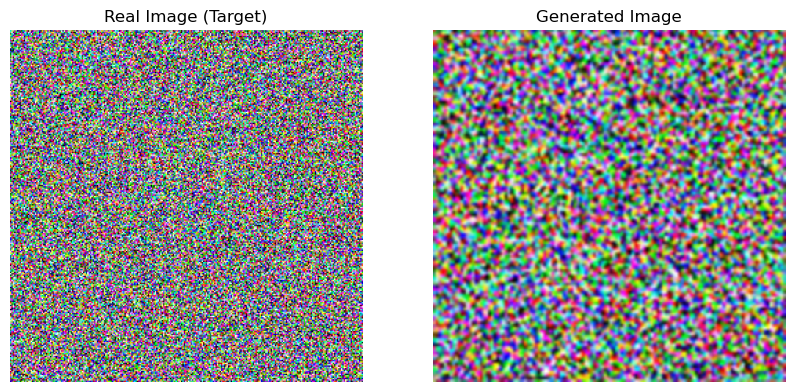

Epoch: 11/50, Gen Loss: 0.8646399974822998, Disc Loss: 0.0012748176231980324
Epoch: 12/50, Gen Loss: 0.8599163889884949, Disc Loss: 0.001194817596115172
Epoch: 13/50, Gen Loss: 0.855384886264801, Disc Loss: 0.0010968353599309921
Epoch: 14/50, Gen Loss: 0.8510360717773438, Disc Loss: 0.000985806225799024
Epoch: 15/50, Gen Loss: 0.8468696475028992, Disc Loss: 0.000872831093147397
Epoch: 16/50, Gen Loss: 0.8428821563720703, Disc Loss: 0.0007658392423763871
Epoch: 17/50, Gen Loss: 0.839066207408905, Disc Loss: 0.0006678394856862724
Epoch: 18/50, Gen Loss: 0.8354008793830872, Disc Loss: 0.0005812931922264397
Epoch: 19/50, Gen Loss: 0.8318762183189392, Disc Loss: 0.0005084392614662647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch: 20/50, Gen Loss: 0.8284996151924133, Disc Loss: 0.0004452261491678655


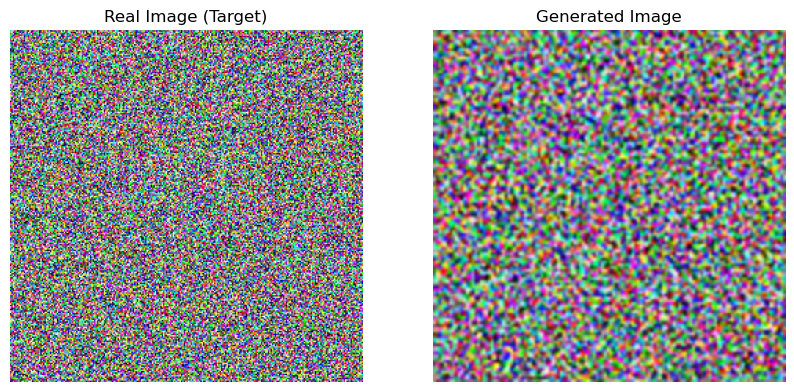

Epoch: 21/50, Gen Loss: 0.8252566456794739, Disc Loss: 0.0003906119673047215
Epoch: 22/50, Gen Loss: 0.8221325278282166, Disc Loss: 0.00034611712908372283
Epoch: 23/50, Gen Loss: 0.8191359639167786, Disc Loss: 0.0003073320258408785
Epoch: 24/50, Gen Loss: 0.8162593245506287, Disc Loss: 0.00027527561178430915
Epoch: 25/50, Gen Loss: 0.8135001063346863, Disc Loss: 0.0002469314495101571
Epoch: 26/50, Gen Loss: 0.8108561635017395, Disc Loss: 0.00022213716874830425
Epoch: 27/50, Gen Loss: 0.8083332180976868, Disc Loss: 0.000201004309928976
Epoch: 28/50, Gen Loss: 0.8059000968933105, Disc Loss: 0.0001824383798521012
Epoch: 29/50, Gen Loss: 0.8035731911659241, Disc Loss: 0.0001668698387220502


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch: 30/50, Gen Loss: 0.8013507723808289, Disc Loss: 0.0001524835533928126


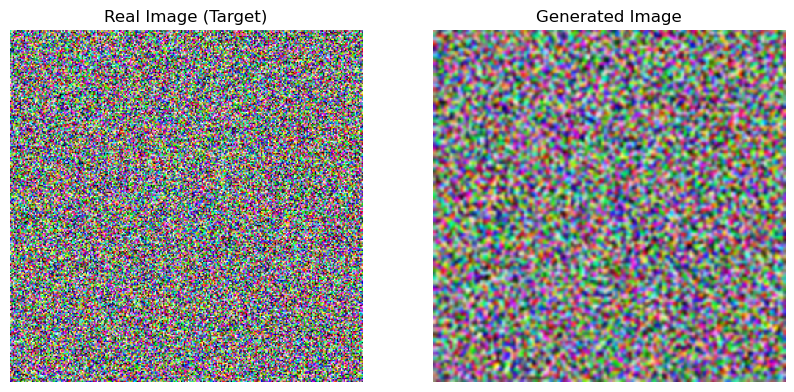

Epoch: 31/50, Gen Loss: 0.7992027401924133, Disc Loss: 0.00013997431960888207
Epoch: 32/50, Gen Loss: 0.7971280217170715, Disc Loss: 0.0001287952036364004
Epoch: 33/50, Gen Loss: 0.7951177954673767, Disc Loss: 0.00011922898556804284
Epoch: 34/50, Gen Loss: 0.7931861281394958, Disc Loss: 0.00011041264951927587
Epoch: 35/50, Gen Loss: 0.7913055419921875, Disc Loss: 0.00010282083530910313
Epoch: 36/50, Gen Loss: 0.7894822955131531, Disc Loss: 9.565542859490961e-05
Epoch: 37/50, Gen Loss: 0.7877358794212341, Disc Loss: 8.963546133600175e-05
Epoch: 38/50, Gen Loss: 0.7860434651374817, Disc Loss: 8.401978993788362e-05
Epoch: 39/50, Gen Loss: 0.7844047546386719, Disc Loss: 7.914561865618452e-05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch: 40/50, Gen Loss: 0.7828518748283386, Disc Loss: 7.396630826406181e-05


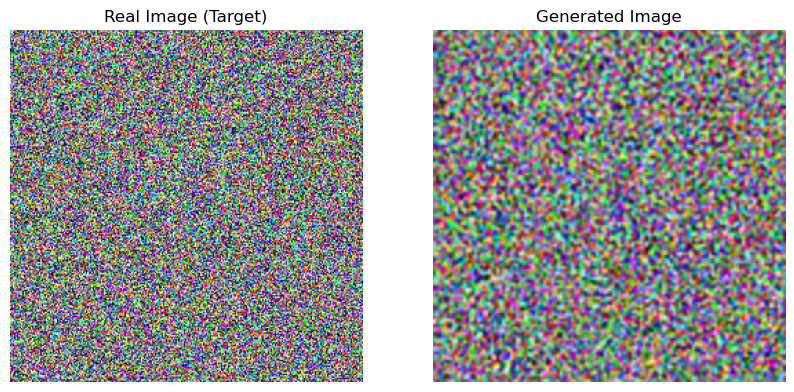

Epoch: 41/50, Gen Loss: 0.7813721299171448, Disc Loss: 7.018323958618566e-05
Epoch: 42/50, Gen Loss: 0.7799491286277771, Disc Loss: 6.558536551892757e-05
Epoch: 43/50, Gen Loss: 0.7785250544548035, Disc Loss: 6.259894871618599e-05
Epoch: 44/50, Gen Loss: 0.7771549224853516, Disc Loss: 5.8740522945299745e-05
Epoch: 45/50, Gen Loss: 0.7758142948150635, Disc Loss: 5.581367076956667e-05
Epoch: 46/50, Gen Loss: 0.7744653820991516, Disc Loss: 5.291825073072687e-05
Epoch: 47/50, Gen Loss: 0.7731948494911194, Disc Loss: 5.033460911363363e-05
Epoch: 48/50, Gen Loss: 0.7720168232917786, Disc Loss: 4.785552664543502e-05
Epoch: 49/50, Gen Loss: 0.7708799242973328, Disc Loss: 4.5460696128429845e-05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch: 50/50, Gen Loss: 0.7697746157646179, Disc Loss: 4.342701140558347e-05


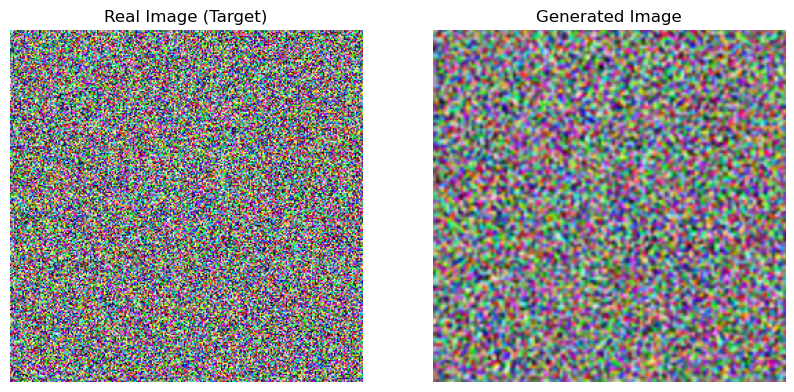

Training completed!


In [7]:

# Dummy data for illustration (Replace with your actual data)
train_horses = tf.random.normal([1, 256, 256, 3])  # Example: 1 image of size 256x256x3
train_zebras = tf.random.normal([1, 256, 256, 3])  # Example: 1 target image of size 256x256x3

# Training Loop
epochs = 50
for epoch in range(epochs):
    for image, target in zip(train_horses, train_zebras):
        image = tf.expand_dims(image, 0)  # Ensure shape is (1, 256, 256, 3)
        target = tf.expand_dims(target, 0)  # Ensure shape is (1, 256, 256, 3)

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            # Generate the image
            generated_image = generator(image, training=True)  # Shape: (1, 256, 256, 3)

            # Now the discriminator can accept the generated image with the correct shape
            disc_real_output = discriminator(target, training=True)  # Real image output
            disc_generated_output = discriminator(generated_image, training=True)  # Fake image output

            # Compute losses
            gen_loss = generator_loss(disc_generated_output, generated_image, target)
            disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

        # Compute gradients and apply them
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        print(f"Epoch: {epoch + 1}/{epochs}, Gen Loss: {gen_loss}, Disc Loss: {disc_loss}")

    # Visualize images every 10th epoch
    if (epoch + 1) % 10 == 0:
        # Plot the original (real) image and the generated image
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        # Show the real image (before generation)
        ax[0].imshow((target[0].numpy() + 1) / 2)  # Rescale to [0, 1] for visualization
        ax[0].set_title("Real Image (Target)")
        ax[0].axis('off')

        # Show the generated image (after generation)
        ax[1].imshow((generated_image[0].numpy() + 1) / 2)  # Rescale to [0, 1] for visualization
        ax[1].set_title("Generated Image")
        ax[1].axis('off')

        # Save the plot to a file
        plt.savefig(f"image_comparison_epoch_{epoch+1}.png")
        plt.show()

print("Training completed!")
